<a href="https://colab.research.google.com/github/hexs/format-inventory/blob/main/format_inventory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import os
import cv2
import matplotlib.pyplot as plt
from google.colab import files
import pandas as pd
import math
import urllib.request
from IPython.display import clear_output

In [45]:
def max_return_0(max, v):
  if v>max:
    return 0
  else:
    return v

In [46]:
def to_a4(img1, img2, img3, img4, img5, img6):
  r1     = cv2.hconcat([img1, img2])
  r2     = cv2.hconcat([img3, img4])
  r3     = cv2.hconcat([img5, img6])
  img_a4 = cv2.vconcat([r1, r2, r3])
  return img_a4
  # plt.imshow(img_a4)
  # plt.show()

In [47]:
def grid_img(x):
  x=x-1
  img = cv2.imread('for A4.jpg')
  if x == -1:
    return img

  part_no          = df.loc[x, 'PART NO.']
  part_name        = df.loc[x, 'PART NAME']
  qty              = df.loc[x, "Q'TY"]
  name_of_counting = df.loc[x, "NAME"]
  item             = df.loc[x, "ITEM"]


  part_no_pos          = 376, 301
  part_name_pos        = 376, 544
  qty_pos              = 376, 787
  name_of_counting_pos = 376, 1031
  n_pos                = 1031, 151

  img = cv2.putText(img,part_no,part_no_pos,                        1, 3.7, (0,0,0) ,3)
  img = cv2.putText(img,part_name,part_name_pos,                    1, 3.0, (0,0,0) ,3)
  img = cv2.putText(img,f'{qty}',qty_pos,                           1, 3.7, (0,0,0) ,3)
  img = cv2.putText(img,f'{name_of_counting}',name_of_counting_pos, 1, 3.7, (0,0,0) ,3)
  img = cv2.putText(img,f'{item}',n_pos,                         1, 3.7, (0,0,0) ,3)

  # cv2.imwrite(f'img/{x:03}.jpg',img)
  return img

In [48]:
list_dir = os.listdir()
print(list_dir)

if "format_inventory.xlsx" not in list_dir:
  print('download format_inventory.xlsx')
  url = "https://raw.githubusercontent.com/hexs/format-inventory/main/format_inventory.xlsx"
  filename = "format_inventory.xlsx"
  urllib.request.urlretrieve(url, filename)

if "for A4.jpg" not in list_dir:
  print('for A4.jpg')
  url = "https://raw.githubusercontent.com/hexs/format-inventory/main/for%20A4.jpg"
  filename = "for A4.jpg"
  urllib.request.urlretrieve(url, filename)
  img = cv2.imread(filename)
  plt.imshow(img)
  plt.show()


['.config', 'page', 'format_inventory.xlsx', 'for A4.jpg', 'sample_data']


In [49]:
!rm -rf page
!rm -rf page.zip
os.mkdir('page')

In [50]:
df = pd.read_excel('format_inventory.xlsx')
len_df = len(df)
page = math.ceil(len(df)/6)

print(df)
print(f'len_df = {len_df}')
print(f'page = {page}')

    ITEM      PART NO.  DIM                 PART NAME  Q'TY       NAME
0    237  FM4-G970-000  NaN        PCB ASS'Y BP PLATE     1  YUDTAPONG
1    238  FE3-L676-000  NaN        GUIDE FEEDER UPPER     1  YUDTAPONG
2    239  FE3-L677-000  NaN               COVER UPPER     1  YUDTAPONG
3    240  WT2-6489-000  NaN               CABLE CLAMP     3  YUDTAPONG
4    241  FM4-G971-000  NaN           CABLE,MFP-BP IF     1  YUDTAPONG
5    242  FM4-G972-000  NaN           CABLE,FIN-BP IF     1  YUDTAPONG
6    243  FM4-G973-000  NaN             CABLE,BP UNIT     1  YUDTAPONG
7    244  FE3-F753-000  NaN   SPRING_BP_R_GROUNDING_S     1  YUDTAPONG
8    245  FE3-J416-000  NaN         BRACKET_DW HOLDER     1  YUDTAPONG
9    246  FE3-J418-000  NaN         GUIDE,PCB HARNESS     1  YUDTAPONG
10   247  FE3-J423-000  NaN          CLAW_MOUNTING_BP     1  YUDTAPONG
11   248  FE3-J424-000  NaN        COVER,LOUVER FRONT     1  YUDTAPONG
12   249  FE3-J426-000  NaN          RAIL_GUIDE_BLOCK     1  YUDTAPONG
13   2

In [51]:
df[['ITEM', 'PART NO.', 'PART NAME', "Q'TY", 'NAME']]

,ITEM,PART NO.,PART NAME,Q'TY,NAME
0,237,FM4-G970-000,PCB ASS'Y BP PLATE,1,YUDTAPONG
1,238,FE3-L676-000,GUIDE FEEDER UPPER,1,YUDTAPONG
2,239,FE3-L677-000,COVER UPPER,1,YUDTAPONG
3,240,WT2-6489-000,CABLE CLAMP,3,YUDTAPONG
4,241,FM4-G971-000,"CABLE,MFP-BP IF",1,YUDTAPONG
5,242,FM4-G972-000,"CABLE,FIN-BP IF",1,YUDTAPONG
6,243,FM4-G973-000,"CABLE,BP UNIT",1,YUDTAPONG
7,244,FE3-F753-000,SPRING_BP_R_GROUNDING_S,1,YUDTAPONG
8,245,FE3-J416-000,BRACKET_DW HOLDER,1,YUDTAPONG
9,246,FE3-J418-000,"GUIDE,PCB HARNESS",1,YUDTAPONG


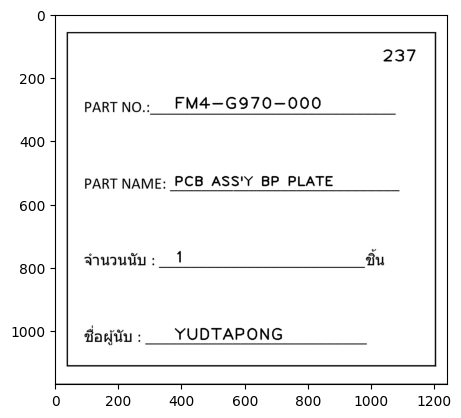

In [52]:
img1 = grid_img(1)
plt.imshow(img1)
plt.show()

In [53]:
for i in range(1,page+1):
  series = [
      max_return_0(len_df, page*1+i), max_return_0(len_df, page*0+i),
      max_return_0(len_df, page*3+i), max_return_0(len_df, page*2+i),
      max_return_0(len_df, page*5+i), max_return_0(len_df, page*4+i)
      ]
  print(series)
  print(max_return_0(len_df, page*1+i), max_return_0(len_df, page*0+i))
  print(max_return_0(len_df, page*3+i), max_return_0(len_df, page*2+i))
  print(max_return_0(len_df, page*5+i), max_return_0(len_df, page*4+i))
  print()

  ia4 = to_a4(
      grid_img(max_return_0(len_df, page*1+i)), grid_img(max_return_0(len_df, page*0+i)),
      grid_img(max_return_0(len_df, page*3+i)), grid_img(max_return_0(len_df, page*2+i)),
      grid_img(max_return_0(len_df, page*5+i)), grid_img(max_return_0(len_df, page*4+i))
  )
  cv2.imwrite(f'page/{i:03}.jpg',ia4)
  # plt.imshow(ia4)
  # plt.show()

clear_output()

In [54]:
!zip -r page.zip page/*
files.download('page.zip')

  adding: page/001.jpg (deflated 47%)
  adding: page/002.jpg (deflated 47%)
  adding: page/003.jpg (deflated 47%)
  adding: page/004.jpg (deflated 47%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>